In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df=pd.read_csv("c:/users/tappino/data/orders_2019.csv", low_memory=False) 

FileNotFoundError: [Errno 2] File c:/users/tappino/data/orders_2019.csv does not exist: 'c:/users/tappino/data/orders_2019.csv'

In [ ]:
df.head()

In [ ]:
df['ORD_DATE'] = pd.to_datetime(df['ORD_DATE'])

In [ ]:
df['ORD_DATE'].min()

In [ ]:
#df['MO_NBR']=pd.to_datetime(df['MO_NBR'])

In [205]:
df = df.set_index('MO_NBR')
df.index

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='MO_NBR', length=11785)

In [ ]:
df

In [174]:
cols =['YR_NBR', 'BUS_DAY_IN_MO', 'TOTAL_BUS_DAYS_IN_MO', 'DAY_NBR', 'SYS_CDE','DIST_CHNL_DESC', 
       'SUM(FST.SLS)' ]

In [175]:
df.drop(cols, axis = 1, inplace = True)

In [176]:
df

,ORD_DATE,SLS_BUS_SEG,COUNT_ORDERS,STATUS
MO_NBR,,,,
1,2-Jan-19,Facility Solutions,71,INVOICED
1,2-Jan-19,Packaging,262,INVOICED
1,2-Jan-19,Print,33,INVOICED
1,2-Jan-19,Facility Solutions,63,INVOICED
1,2-Jan-19,Packaging,24,INVOICED
1,2-Jan-19,Print,13,INVOICED
1,2-Jan-19,Facility Solutions,2625,INVOICED
1,2-Jan-19,Packaging,1314,INVOICED
1,2-Jan-19,Print,764,INVOICED


In [177]:
open_orders = df.loc[df['STATUS'] == 'OPEN']
invoiced_orders = df.loc[df['STATUS'] == 'INVOICED']
prt = df.loc[df['SLS_BUS_SEG'] == 'Print']
pub = df.loc[df['SLS_BUS_SEG'] == 'Publishing']
fs = df.loc[df['SLS_BUS_SEG'] == 'Facility Solutions']
pkg = df.loc[df['SLS_BUS_SEG'] == 'Packaging']

In [178]:
pkg

,ORD_DATE,SLS_BUS_SEG,COUNT_ORDERS,STATUS
MO_NBR,,,,
1,2-Jan-19,Packaging,262,INVOICED
1,2-Jan-19,Packaging,24,INVOICED
1,2-Jan-19,Packaging,1314,INVOICED
1,2-Jan-19,Packaging,222,INVOICED
1,2-Jan-19,Packaging,56,INVOICED
1,2-Jan-19,Packaging,1815,INVOICED
1,2-Jan-19,Packaging,94,INVOICED
1,2-Jan-19,Packaging,18,INVOICED
1,2-Jan-19,Packaging,629,INVOICED


In [179]:
cols2 =['SLS_BUS_SEG', 'STATUS', 'ORD_DATE']

In [180]:
pkg.drop(cols2, axis = 1, inplace = True)

In [181]:
pkg

,COUNT_ORDERS
MO_NBR,
1,262
1,24
1,1314
1,222
1,56
1,1815
1,94
1,18
1,629


In [191]:
pkg.groupby('MO_NBR').sum()

,COUNT_ORDERS
MO_NBR,
1,98850
2,86174
3,87619
4,93614
5,92300
6,81886
7,87917
8,89714
9,81494


In [ ]:
pkg

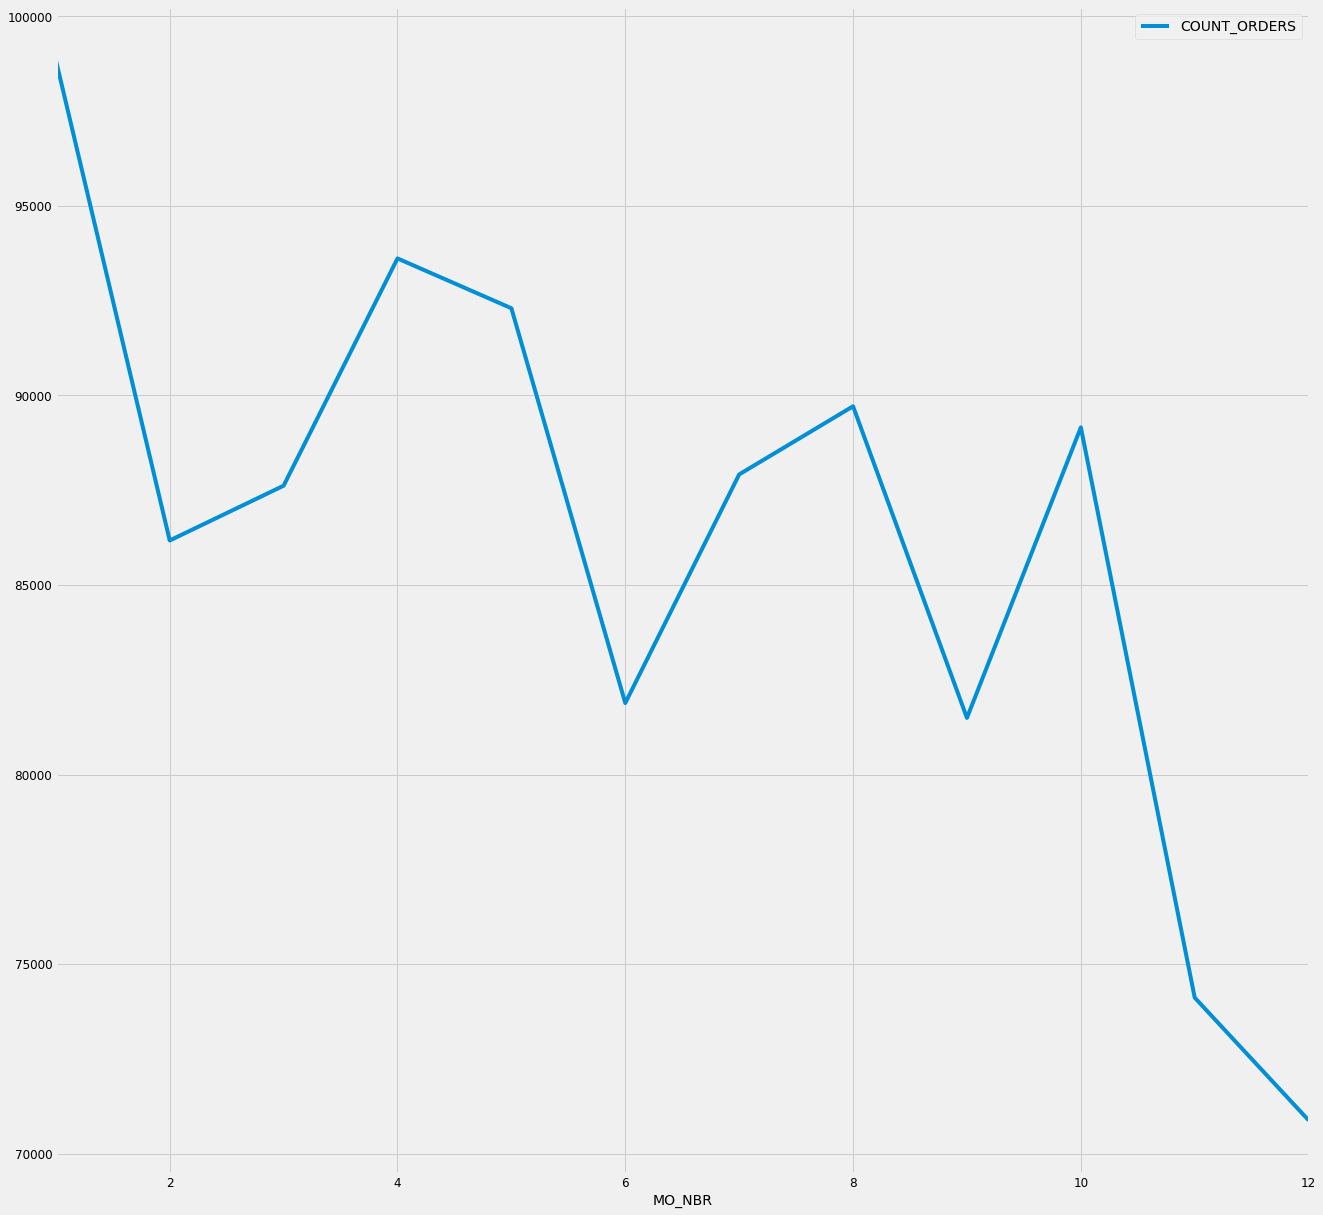

In [183]:
pkg.plot (figsize =(20,20))
plt.show()

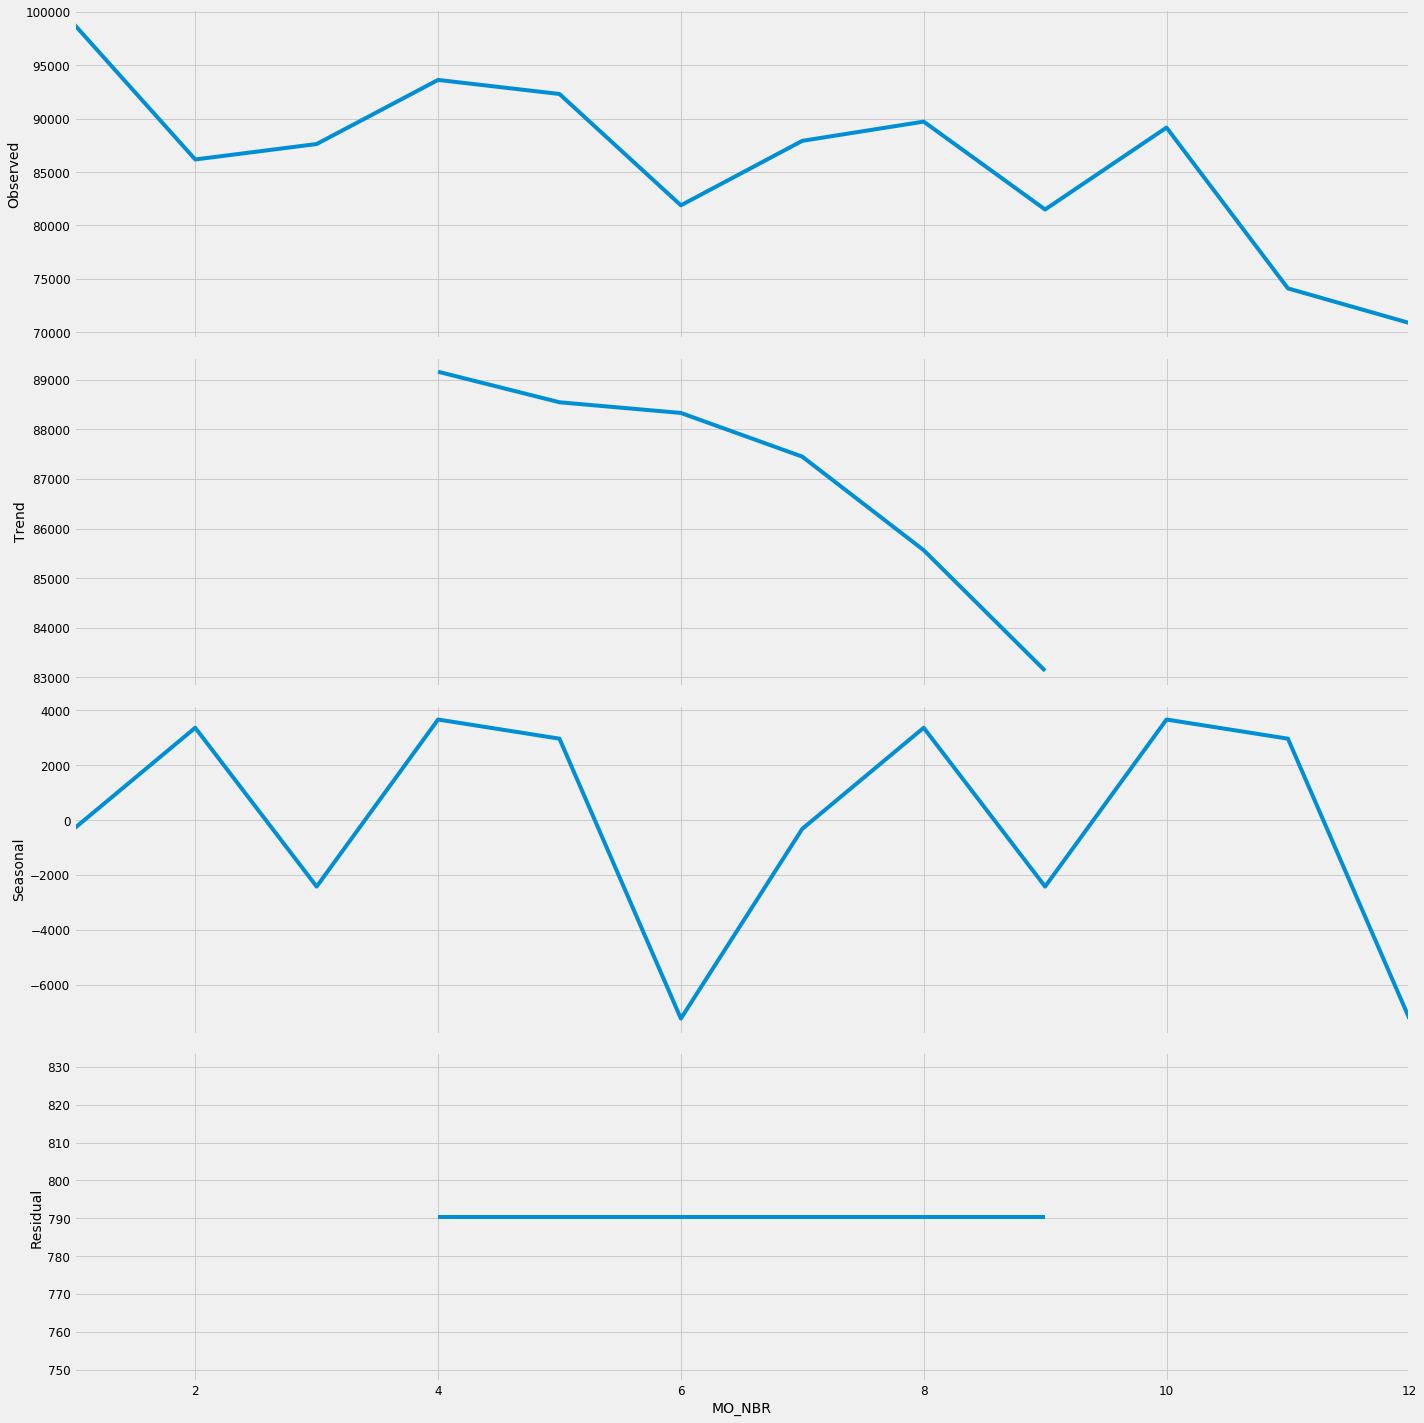

In [193]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,20

decomposition = sm.tsa.seasonal_decompose(pkg, model='additive', freq= 6)
fig = decomposition.plot()
plt.show()

In [194]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [195]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                           order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [198]:
mod = sm.tsa.statespace.SARIMAX(pkg,
                               order=(0, 0, 1),
                               seasonal_order=(0, 0, 1, 6),
                               enforce_stationarity=True,
                               enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])


ValueError: maxlag should be < nobs

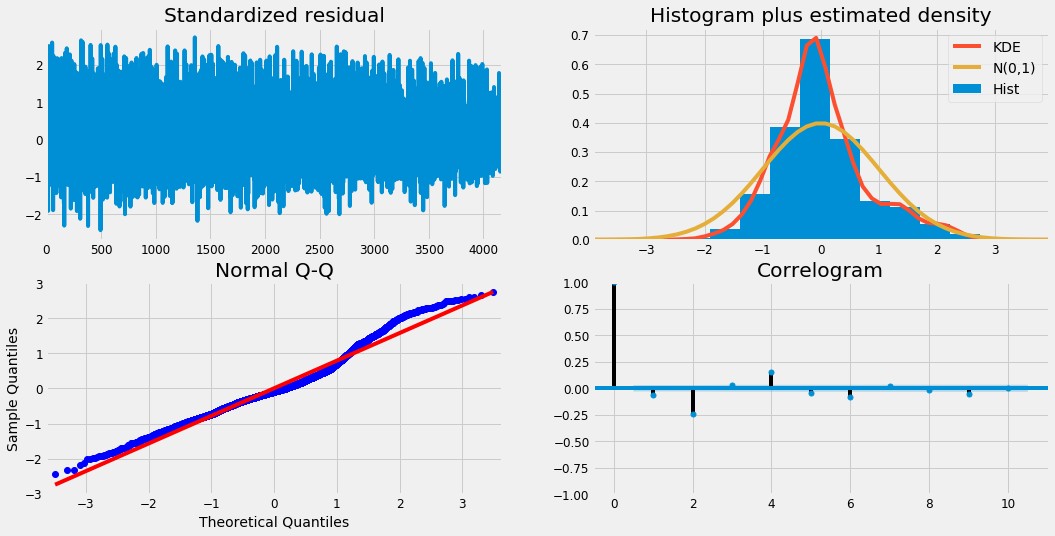

In [199]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()


In [200]:
pred = results.get_prediction()
pred_ci = pred.conf_int()
ax = pkg.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()


ValueError: year 0 is out of range

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001AE342729D8> (for post_execute):


ValueError: year 0 is out of range

ValueError: year 0 is out of range

<Figure size 1008x504 with 1 Axes>

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = pkg['COUNT_ORDERS']

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

In [ ]:
pred_uc = results.get_forecast(steps=365)
pred_ci = pred_uc.conf_int()


ax = pkg['2019':].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')

plt.legend()
plt.show()
